<font size=3 color='blue'>

# <center> Clase 13-1, enero 13, 2021


<font size=5 color="blue">

Connection Geometries in Neural Networks
    
<font size=4 color="black">
$$ $$ 
In the architecture of a neural network, it is important to know where the connections originate and terminate.

<font size=5 color="blue">

Neural Networks with shortcut connections


<font size=4 color="black">

In many problems, the contribution to the response of the input variables is often linear, and nonlinear effects often coincide with small deviations from a linear solution. Such a mixed contribution to the response can be handled with a neural network with shorcut connections; i. e. the input variable to a set of layers is also connected to the output of a set. The set of layers models the nonlinear effect associated to the input variable.

<img src="https://drive.google.com/uc?id=14vXAXWbnIIkbAw6amY64y-QzbrcwE284" width=500 height=400 align = "left" >    
<img src="https://drive.google.com/uc?id=1w-LMaZlQGrCDNyiKF3ujg8gwRAqVQlGU" width=400 height=300 align = "center" >



<font size=4 color="black">
    
[Reference: Spirals separation](./literature/shortcuts_Learning-two-spirals-apart_1989.pdf)

<font size=2 color="black">

## ResNet

<img src="https://drive.google.com/uc?id=14ifbiemD1wP39d6nuzLBXOHBubhA5qNe" width=600 height=400 align = "center" >

<font size=4 color="black">
$$ $$
Residual Learning: a learning block. F(X) represents the nonlinear response of the input X.
$$ $$    

[Reference: ResNet](./literature/RCNN_2016.pdf)
    
[Comment: ResNet in Keras](https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33)


<img src="https://drive.google.com/uc?id=1uq9_rTgOvGDjCn-0lHseNMC3KzkT94bp" width=1000 height=320 align = "center" >

<font size=4 color="black">
    
[Comment: ResNet](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)

 <font size=4 color="black">

With the architecture of the present notebook, we can construct ResNet networks with different number of Layers (indicated with the number).
$$ $$
ResNet-20 

ResNet-32
    
ResNet-44
    
ResNet-56
    
ResNet-110
    
ResNet-164
    
ResNet-1001
    
The execution time of the neural network depends on the number of layers.

<font size=5 color='blue'>
Applications

<font size=4 color='black'> 
    
[Referencia: Dynamical System Evolution](./literature/resnet_applications/Dynamical_system_evolution_2019.pdf)

<font size=4 color='black'> 
    
[Referencia: Health Monitoring](./literature/resnet_applications/health_monitoring_2020.pdf)

<font size=4 color='black'> 
    
[Referencia: Land Use Detection](./literature/resnet_applications/Land-use-detection_2019.pdf)

<font size=4 color='black'> 
    
[Referencia: Time Series Classification](./literature/resnet_applications/Timeseries_classification.pdf)

<font size=5 color="blue">

Extensions of ResNet

<font size=4 color="black">

[Reference: Adjustable shorcut connections](./literature/Improving_ResNet_2018.pdf)
    
[Reference: ResNext](./literature/ResNeXt_2017.pdf)

[Reference: DenseNet](./literature/DEnse_CNN2017.pdf)

<font size=5 color="blue">

Deep Learning: ResNet 

In [ ]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


In [1]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.utils import plot_model

import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import time

<font size=5 color="blue">

Data of the System to be analyzed: CIFAR10

<font size=4 color='black'>

Generation or extraction of the raw data
  

In [2]:
# Number of classes
num_classes = 10

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# Input image dimensions.
input_shape = x_train.shape[1:]

print(input_shape)

(32, 32, 3)


<font size=5 color='blue'>

Analysis of the raw data

<font size=4 color='black'>   
 The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The ten classes are:

| index | class name |
| --- | --- |
| 0 | airplane |
| 1 | automobile | 										
| 2 | bird |										
| 3 | cat |										
| 4 | deer |										
| 5 | dog |										
| 6 | frog |										
| 7 | horse |										
| 8 | ship |										
| 9 | truck|

<font size=4 color='black'>
    
We define a dictionary to associate the class number to a class name.



In [5]:
# We define a dictionary to associate the class number to a class name.

dic = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
       5: 'dog', 6: 'frog', 7:'horse', 8: 'ship', 9: 'truck'}

<font size=4 color="black">
    
Viewing one sample from the data sets

In [6]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

<font size=4 color="black">
    
Every value of X in the example is between 0 and 255, they are not normalized.

In [7]:
y_train[0]

array([6], dtype=uint8)

<font size=4 color="black">
    
Next, we show a sample: its target and image.

y = 3 ; the sample 9 corresponds to a cat


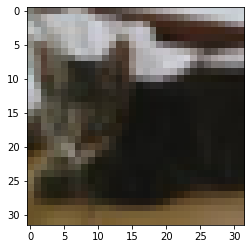

In [8]:
sample = 9

plt.imshow(x_train[sample]);

print('y =',  np.squeeze(y_train[sample]), ';', 'the sample', sample,\
      'corresponds to a', dic[int(np.squeeze(y_train[sample]))])

<font size=5 color='blue'>

Transformation of the raw data 

<font size=4 color="black">
$$ $$
To normalize the X values of an image, we divide each pixel value by 255

In [9]:
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

In [11]:
# If subtract pixel mean is enabled

if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

In [12]:
x_train[0][0]

array([[-0.28121656, -0.2904184 , -0.272762  ],
       [-0.3417282 , -0.35075825, -0.3406073 ],
       [-0.31784582, -0.3460663 , -0.35130537],
       [-0.24929157, -0.3242303 , -0.3563872 ],
       [-0.13406172, -0.2518796 , -0.31870103],
       [-0.05432341, -0.18374744, -0.27757806],
       [ 0.02206933, -0.12268624, -0.23199037],
       [ 0.04356331, -0.11271378, -0.21382466],
       [ 0.05692065, -0.08735809, -0.18045619],
       [ 0.05516279, -0.07699654, -0.16585878],
       [-0.01660705, -0.14487293, -0.22945985],
       [-0.04080406, -0.16114703, -0.23396876],
       [ 0.02501225, -0.0991011 , -0.1757606 ],
       [ 0.03280276, -0.11083832, -0.19533703],
       [ 0.00535029, -0.13814858, -0.22266653],
       [-0.02593207, -0.16931179, -0.2538093 ],
       [ 0.00575948, -0.13370737, -0.22189823],
       [-0.00590163, -0.13358232, -0.2335603 ],
       [-0.04506794, -0.16884515, -0.28069678],
       [ 0.01417804, -0.1057376 , -0.22539553],
       [ 0.01525122, -0.10868725, -0.236

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [14]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
print('y_train shape =', y_train.shape)

y_train shape = (50000, 10)


<font size=5 color='blue'>

Definition of the neural network architecture
  

<font size=4 color='black'>
    
Learning Rate Schedule

Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs. Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate

In [17]:
def lr_schedule(epoch):

    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    
    return lr


<font size=4 color='black'>
    
2D Convolution-Batch Normalization-Activation stack builder

In [18]:
def resnet_layer(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    '''
        # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    '''
    
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


<font size=4 color='black'>


    
ResNet Version 1 Model, accoding to the following paper: [Model 1](./literature/RCNN_2016.pdf) 

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number of filters and the
    same filter map sizes.
    
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    
    The Number of parameters is approx the same as Table 6 of paper cited above.
    
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

In [19]:
def resnet_v1(input_shape, depth, num_classes=10):
    
    '''
    # Arguments
    input_shape (tensor): shape of input image tensor
    depth (int): number of core convolutional layers
    num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
    model (Model): Keras model instance
    '''
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)
    print('The number of stages = ', num_res_blocks,'\n' )

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


<font size=4 color='black'>
   
ResNet Version 2 Model. According to the following paper: [Model 2](./literature/Model2_2016.pdf)

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number of filters and the
    same filter map sizes.
    
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

In [20]:
def resnet_v2(input_shape, depth, num_classes=10):
    
    '''
    # Arguments
    input_shape (tensor): shape of input image tensor
    depth (int): number of core convolutional layers
    num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
    model (Model): Keras model instance
    '''
    
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)
    print('The number of stages = ', num_res_blocks, '\n')

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

<font size=5 color='blue'>

Generating a model of deep neural network 

<font size=4 color='black'>

Choosing between Model1 and Model2

In [21]:
# Summary of the results described in the papers of Model1 and Model2
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------

# Model version

# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 2

# This is valid only for ResNet20. The respective values should be changed for another version of ResNet 

if version == 1:
    n = 3    # For Model ResNet20 version 1
elif version == 2:
    n = 2    # For Model ResNet20 version 2
    
    

In [22]:
num_classes = 10

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2


if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth, num_classes = num_classes)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth, num_classes = num_classes)

The number of stages =  2 



In [23]:

print("The number of layers in depth is ", depth)
print("It excludes the pooling and dense (full connected) layers ")

The number of layers in depth is  20
It excludes the pooling and dense (full connected) layers 


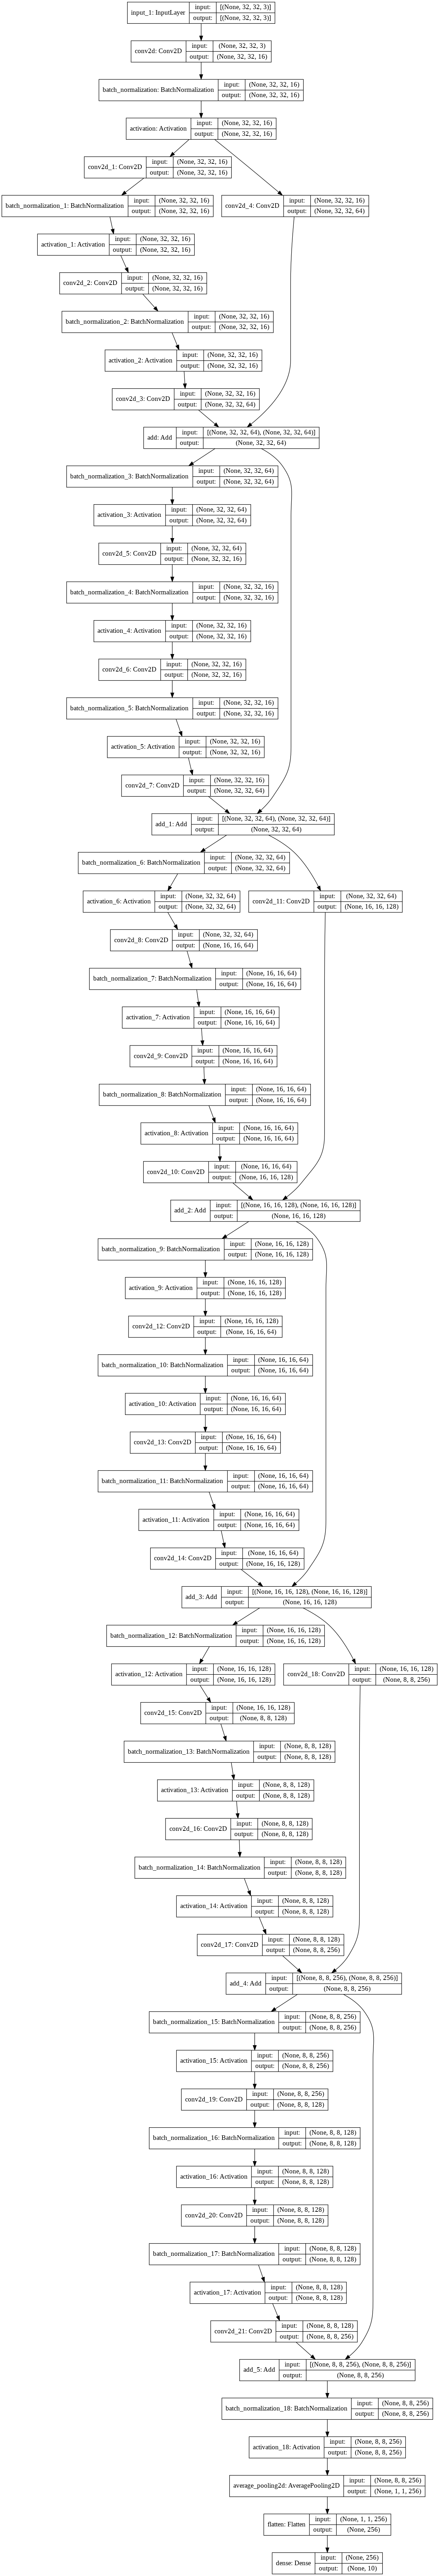

In [24]:

plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

<font size=5 color='blue'>

Compiling the model 

In [26]:
#Compiling the model using Adam as optimizer

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])


Learning rate:  0.001


In [27]:
# Model name, depth and version

model_type = 'ResNet%dv%d' % (depth, version)

print(model_type)

ResNet20v2


In [28]:
# Prepare model saving directory.

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


In [29]:
# Prepare callbacks for model saving and for learning rate adjustment.

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]


<font size=5 color='blue'>

Running the model    

In [30]:
# Training parameters

data_augmentation = False
batch_size = 32  # original paper trained all networks with batch_size=128
epochs =200


In [31]:
# Run training, with or without data augmentation.

start_time = time.time()

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    
    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)
    
end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Not using data augmentation.
Epoch 1/200
Learning rate:  0.001
1563/1563 [==============================] - 33s 16ms/step - loss: 1.9200 - accuracy: 0.4376 - val_loss: 1.7239 - val_accuracy: 0.4677
Epoch 2/200
Learning rate:  0.001
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2808 - accuracy: 0.6437 - val_loss: 1.9588 - val_accuracy: 0.4958
Epoch 3/200
Learning rate:  0.001
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0826 - accuracy: 0.7069 - val_loss: 1.2523 - val_accuracy: 0.6505
Epoch 4/200
Learning rate:  0.001
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9530 - accuracy: 0.7511 - val_loss: 1.3063 - val_accuracy: 0.6501
Epoch 5/200
Learning rate:  0.001
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8644 - accuracy: 0.7819 - val_loss: 1.0677 - val_accuracy: 0.7230
Epoch 6/200
Learning rate:  0.001
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8066 - accuracy: 0.8072

In [32]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


313/313 [==============================] - 2s 6ms/step - loss: 1.0187 - accuracy: 0.8471
Test loss: 1.0186957120895386
Test accuracy: 0.847100019454956


<font size=4 color="black">
    
* Note: if you run `fit()` again, the `model` will continue training, starting with the parameters it has already learnt, instead of reinitializing them.


<font size=5 color='blue'>

Plotting the loss function 

In [33]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Lr = 0.001, loss_train: 0.1665, \n loss_val: 0.4389, BatchNorm=True \n Data_augmentation=True')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.ylim(top=13)    # The instruction is used to limit the upper value of the loss function 
#plt.ylim(bottom=0)  # The instruction is used to limit the lower value of the loss function
plt.show()

KeyError: ignored

<font size=5 color='blue'>

Plotting the accuracy 

In [35]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Lr = 0.001, Acc_train: 0.9860, \n Acc_val: 0.9174 BatchNorm=True \n Data_augmentation=True')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

KeyError: ignored

<font size=4 color="black">
    
[Summary of the runs for 200 epochs](Clase-13.odt)